In [68]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/iris.data',header=None)
X = data.iloc[:, :-1]
print(X.head(5))

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [ ]:
#pip install kneed

**кластеризация методом k-средних**

In [70]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++',n_clusters=3, n_init=15)
k_means.fit(X)

KMeans(n_clusters=3, n_init=15)

In [71]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
print(k_means_labels)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


[<Axes: > <Axes: > <Axes: >]


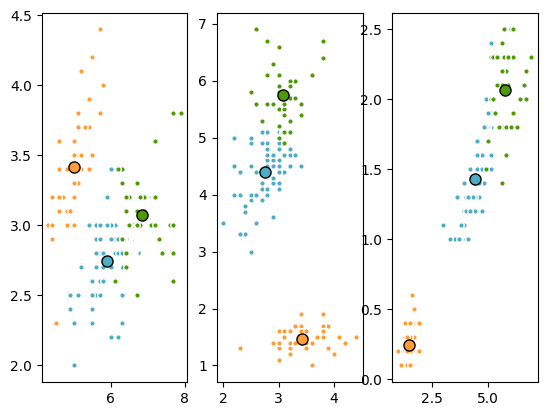

In [72]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5','#FF9C34','#4E9A06']
print(ax)
for i in range(3):
  my_members = k_means_labels == i
  cluster_center = k_means_cluster_centers[i]
  #print(cluster_center)
  for j in range(3):
    ax[j].plot(X.loc[my_members, j], X.loc[my_members, j+1],'w',markerfacecolor=colors[i], marker='o',markersize=4)
    ax[j].plot(cluster_center[j], cluster_center[j+1],'o',markerfacecolor=colors[i],markeredgecolor='k', markersize=8)
plt.show()

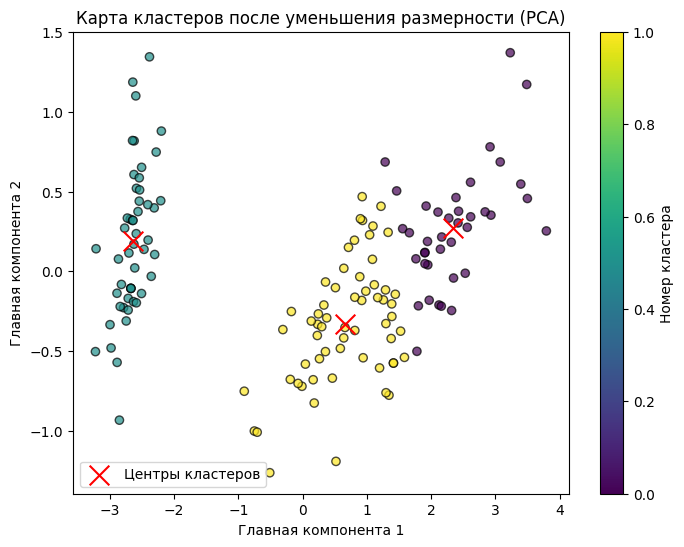

In [73]:
from sklearn.decomposition import PCA
# Применяем метод главных компонент (PCA) для уменьшения размерности до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Кластеризация методом k-средних (3 кластера)
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15, random_state=42)
k_means.fit(X_pca)
labels = k_means.labels_
centers = k_means.cluster_centers_  # Получаем центры кластеров

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Центры кластеров')  # Отображаем центры
plt.title('Карта кластеров после уменьшения размерности (PCA)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Номер кластера')
plt.legend()
plt.show()



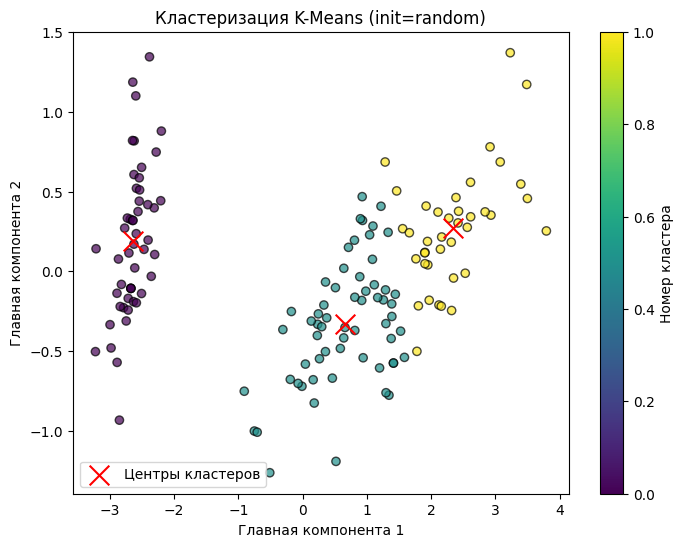

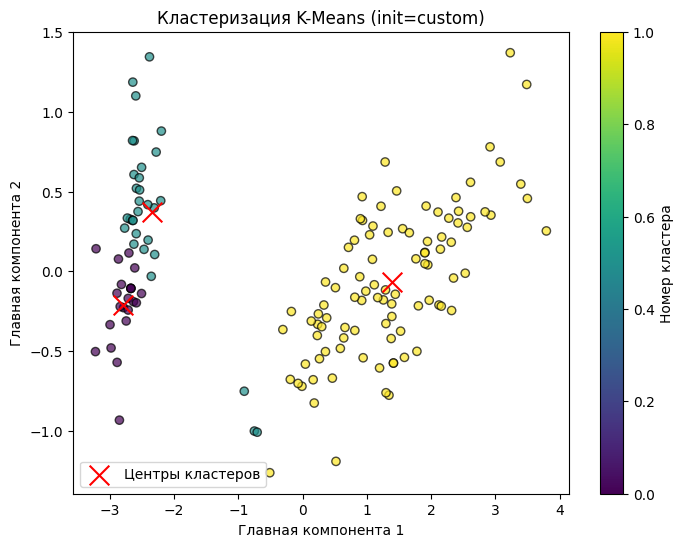

In [74]:
# Функция для визуализации кластеров
def plot_clusters(X_pca, labels, centers, title):
  plt.figure(figsize=(8, 6))
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Центры кластеров')
  plt.title(title)
  plt.xlabel('Главная компонента 1')
  plt.ylabel('Главная компонента 2')
  plt.colorbar(label='Номер кластера')
  plt.legend()
  plt.show()

# Исследуем влияние параметра init
init_methods = ['random', 'custom']

for method in init_methods:
    if method == 'random':
        k_means = KMeans(init='random', n_clusters=3, n_init=15, random_state=42)
    else:
        # Выбираем вручную центры кластеров (например, три случайные точки из данных)
        custom_centers = np.array([X_pca[13], X_pca[42], X_pca[77]])
        k_means = KMeans(init=custom_centers, n_clusters=3, n_init=1, random_state=42)

    k_means.fit(X_pca)
    labels = k_means.labels_
    centers = k_means.cluster_centers_

    plot_clusters(X_pca, labels, centers, f'Кластеризация K-Means (init={method})')




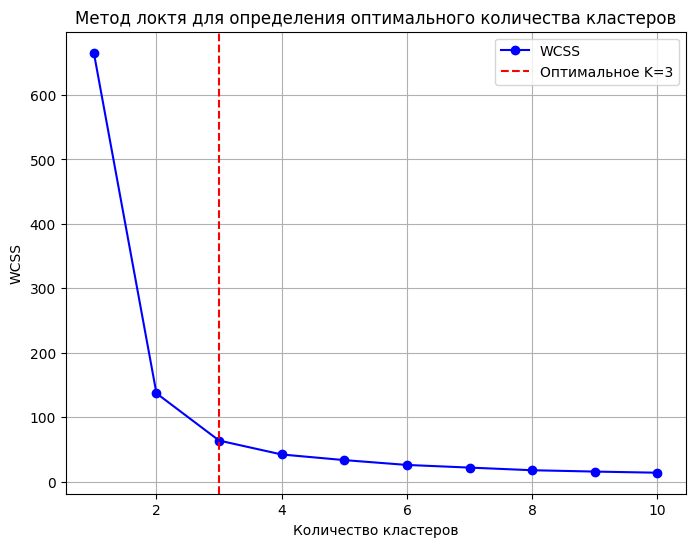

Оптимальное количество кластеров: 3


In [75]:
# Метод локтя для определения оптимального количества кластеров
from kneed import KneeLocator
wcss = []  # Список для значений WCSS (Within-Cluster Sum of Squares)
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # inertia_ — это сумма квадратов расстояний до центроидов

# Определение точки локтя
knee_locator = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow  # Получаем оптимальное количество кластеров

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b', label='WCSS')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Оптимальное K={optimal_k}')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.legend()
plt.grid(True)
plt.show()

print(f'Оптимальное количество кластеров: {optimal_k}')

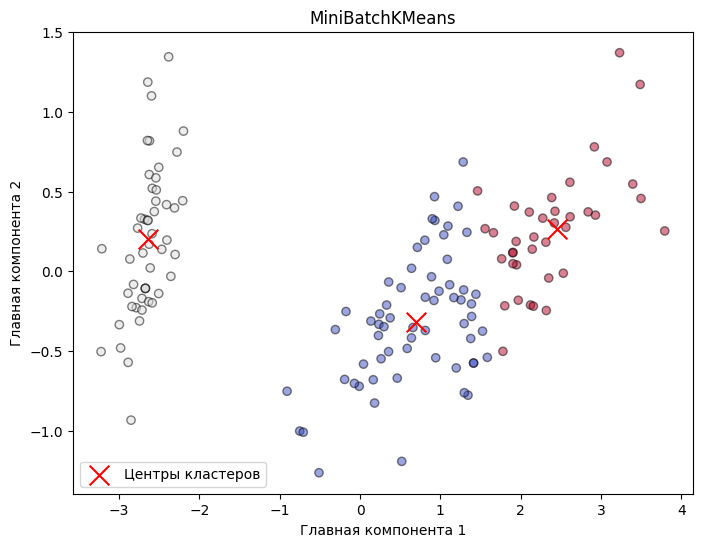

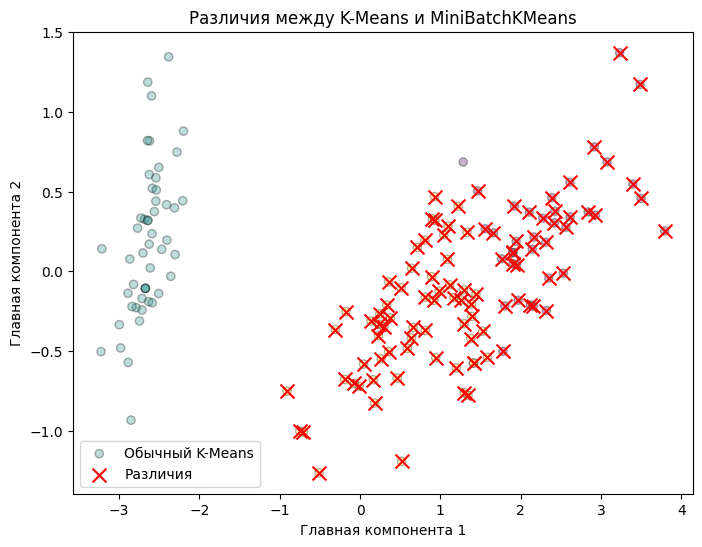

In [76]:
from sklearn.cluster import MiniBatchKMeans
# Обычный K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_centers = kmeans.cluster_centers_

# Пакетный K-Means (MiniBatchKMeans)
mb_kmeans = MiniBatchKMeans(n_clusters=optimal_k, init='k-means++', n_init=15, random_state=42, batch_size=20)
mb_kmeans_labels = mb_kmeans.fit_predict(X_pca)
mb_kmeans_centers = mb_kmeans.cluster_centers_

# Найдем точки, которые попали в разные кластеры в двух методах
mismatch_mask = kmeans_labels != mb_kmeans_labels

# Визуализация кластеров для MiniBatchKMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mb_kmeans_labels, cmap='coolwarm', edgecolors='k', alpha=0.5)
plt.scatter(mb_kmeans_centers[:, 0], mb_kmeans_centers[:, 1], c='red', marker='x', s=200, label='Центры кластеров')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('MiniBatchKMeans')
plt.legend()
plt.show()

# Визуализация различий между методами
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', alpha=0.3, label='Обычный K-Means')
plt.scatter(X_pca[mismatch_mask, 0], X_pca[mismatch_mask, 1], c='red', marker='x', s=100, label='Различия')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Различия между K-Means и MiniBatchKMeans')
plt.legend()
plt.show()

 Отличие MiniBatchKMeans от KMeans:
1. MiniBatchKMeans использует небольшие случайные подвыборки данных (батчи), что ускоряет обучение.
2. Обычный KMeans пересчитывает центроиды после каждой итерации на всех данных.
3. MiniBatchKMeans подходит для больших объемов данных, но может давать менее точные кластеры из-за стохастичности.


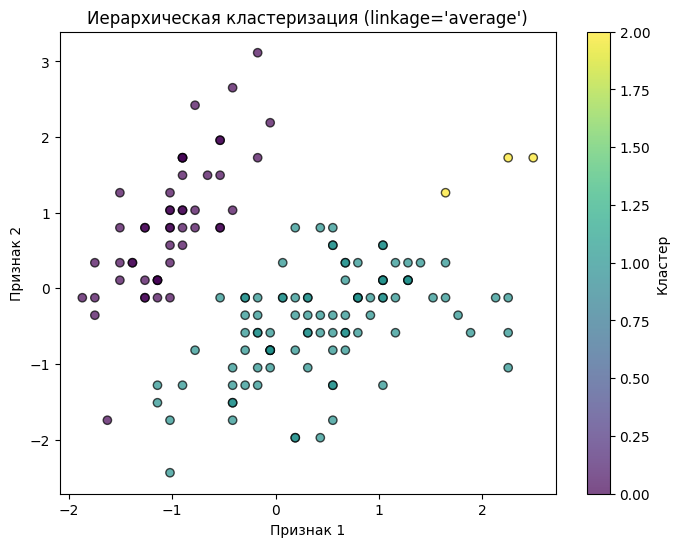

In [77]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Нормализация данных для лучшей работы алгоритма
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Проведение иерархической кластеризации
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
hier_labels = hierarchical.fit_predict(X_scaled)

# 3. Визуализация результатов кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hier_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Иерархическая кластеризация (linkage='average')")
plt.colorbar(label='Кластер')
plt.show()

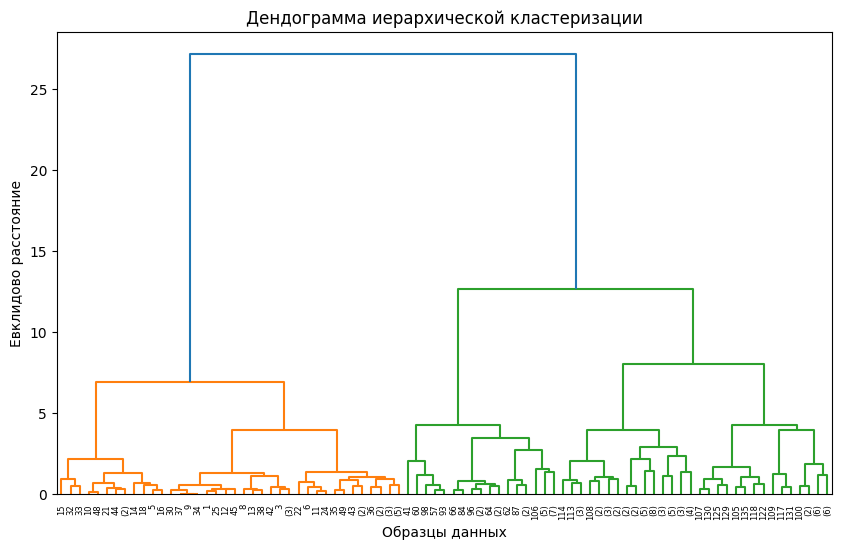

In [78]:
# 4. Нарисуем дендрограмму
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=6)
plt.title("Дендограмма иерархической кластеризации")
plt.xlabel("Образцы данных")
plt.ylabel("Евклидово расстояние")
plt.show()

In [79]:
import random
import math
data1 = np.zeros([250,2])
for i in range(250):
  r = random.uniform(1, 3)
  a = random.uniform(0, 2 * math.pi)
  data1[i,0] = r * math.sin(a)
  data1[i,1] = r * math.cos(a)

data2 = np.zeros([500,2])
for i in range(500):
  r = random.uniform(5, 9)
  a = random.uniform(0, 2 * math.pi)
  data2[i,0] = r * math.sin(a)
  data2[i,1] = r * math.cos(a)

data3 = np.vstack((data1, data2))

<ipython-input-83-17524e2a5fdf>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data3[my_members, 0], data3[my_members, 1], 'w', marker='o',
<ipython-input-83-17524e2a5fdf>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data3[my_members, 0], data3[my_members, 1], 'w', marker='o',


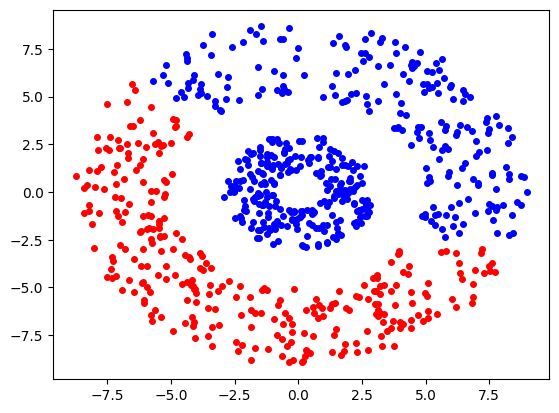

In [83]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier = hier.fit(data3)
hier_labels = hier.labels_

my_members = hier_labels == 0
plt.plot(data3[my_members, 0], data3[my_members, 1], 'w', marker='o',
         markersize=4, color='red', linestyle='None')

my_members = hier_labels == 1
plt.plot(data3[my_members, 0], data3[my_members, 1], 'w', marker='o',
         markersize=4, color='blue', linestyle='None')

plt.show()

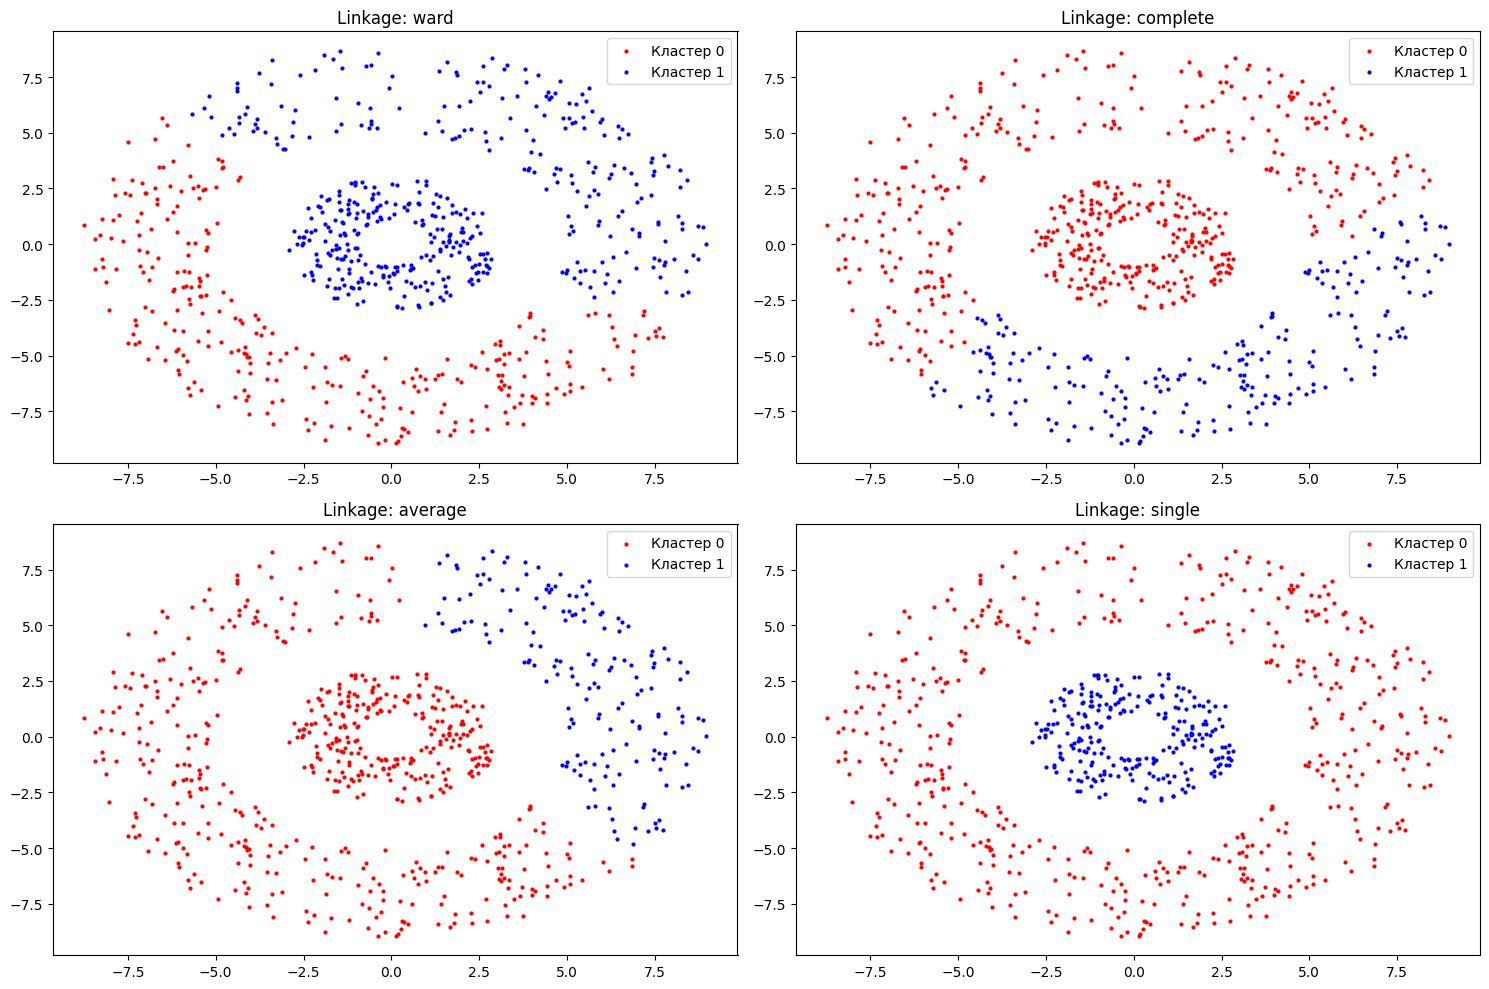

In [81]:
# Параметры linkage для исследования
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(15, 10))

for i, linkage in enumerate(linkage_methods, 1):
    # Выполнение кластеризации
    hier = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hier_labels = hier.fit_predict(data3)

    # Визуализация результатов
    plt.subplot(2, 2, i)
    plt.scatter(data3[hier_labels == 0, 0], data3[hier_labels == 0, 1],
                color='red', marker='o', s=4, label='Кластер 0')
    plt.scatter(data3[hier_labels == 1, 0], data3[hier_labels == 1, 1],
                color='blue', marker='o', s=4, label='Кластер 1')
    plt.title(f'Linkage: {linkage}')
    plt.legend()

plt.tight_layout()
plt.show()

Наилучшие результаты показали методы Ward и Complete linkage, так как они четко разделяют кольцевые структуры.

Single linkage показал наихудшие результаты из-за эффекта "chaining", что типично для этого метода на кольцевых данных.

Выбор метода linkage зависит от:

1.Формы ожидаемых кластеров

2.Наличия шума в данных

3.Желаемой устойчивости к выбросам

4.Размеров кластеров

Для большинства практических задач с компактными кластерами рекомендуется начинать с метода Ward, так как он часто дает наилучшие результаты.